# Test mit PeakUtils (Beispiel)

In [15]:
import numpy
import pandas as pd
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
%matplotlib inline
import mpld3
mpld3.enable_notebook()

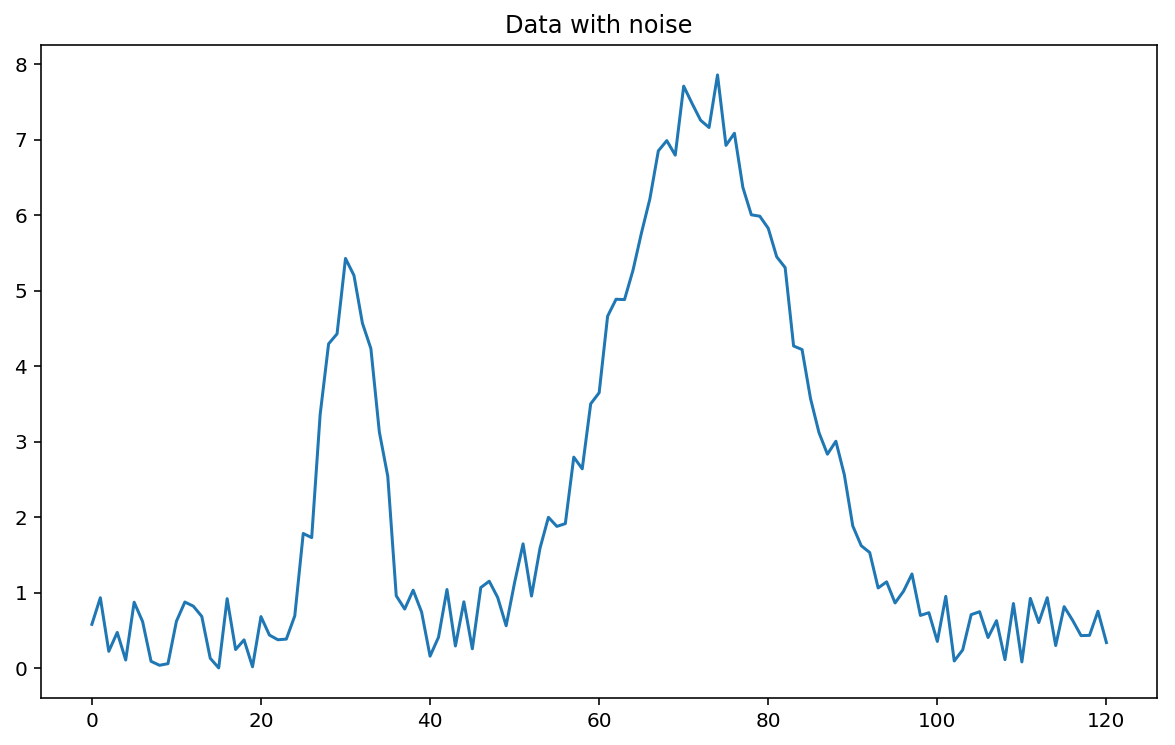

In [16]:
centers = (30.5, 72.3)
x = numpy.linspace(0, 120, 121)
y = (peakutils.gaussian(x, 5, centers[0], 3) +
    peakutils.gaussian(x, 7, centers[1], 10) +
    numpy.random.rand(x.size))
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y)
pyplot.title("Data with noise")

In [17]:
indexes = peakutils.indexes(y, thres=0.5, min_dist=30)
print(indexes)
print(x[indexes], y[indexes])

[30 74]
[ 30.  74.] [ 5.42831454  7.86021826]


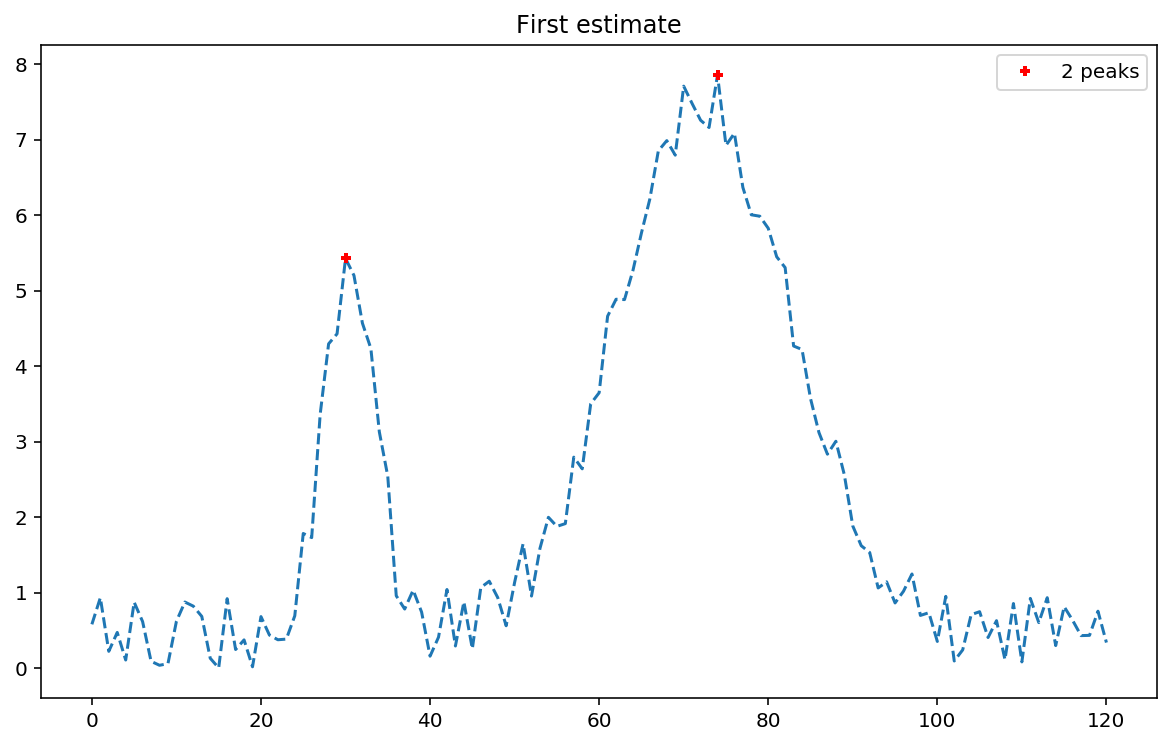

In [18]:
pyplot.figure(figsize=(10,6))
pplot(x, y, indexes)
pyplot.title('First estimate')

# PeakUtils with our're Transients

Zunächst soll ein allgemeiner Überblick über die Transienten gegeben werden, um einen allgemeinen Überblick über der Charakter zubekommen.

In [ ]:
# import csv files
events_from_outside = pd.read_csv("events_from_outside.csv")
transients_1_phase = pd.read_csv("transients_1_phase.csv")
transients_2_phase = pd.read_csv("transients_2_phase.csv")
transients_3_phase = pd.read_csv("transients_3_phase.csv")

In [19]:
# get filtered voltage singnals
transients_filtered = transients_1_phase['filtered_signal'].apply(pd.Series).fillna(0)
transients_filtered.head()

,0,1,2,3,4,5,6,7,8,9,...,10002,10003,10004,10005,10006,10007,10008,10009,10010,10011
1.488462e+09,-0.130031,0.000078,-0.038848,0.039155,0.039402,0.052451,0.078481,-0.064314,-0.103554,0.065670,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.488462e+09,0.142555,0.033610,0.102452,0.181336,0.035356,0.033818,0.008446,-0.033178,0.048887,0.141225,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.488462e+09,0.107352,0.093924,-0.040262,-0.174478,-0.161050,-0.228159,-0.335519,-0.268411,-0.389200,-0.483133,...,0.483145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.488469e+09,-0.532786,-0.585368,-0.324715,-0.208262,-0.051576,0.155943,0.234580,0.130070,0.052790,-0.259874,...,0.896775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.488521e+09,-0.586819,-0.392881,-0.509044,-0.392948,-0.483057,-0.315080,-0.470256,-0.289161,-0.366413,-0.444966,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn import preprocessing

In [24]:
data = np.array([70, -5, 5, 3, 2, 1])
scale = preprocessing.minmax_scale(data, feature_range=(-0.5, 0.5))
print(scale)

[ 0.5        -0.5        -0.36666667 -0.39333333 -0.40666667 -0.42      ]


/Users/markus/anaconda/envs/ev_project/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, _DataConversionWarning)


In [30]:
df_normalized = preprocessing.minmax_scale(transients_filtered.T, feature_range=(-1, 1))
df_normalized = pd.DataFrame(df_normalized).T

In [31]:
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,10002,10003,10004,10005,10006,10007,10008,10009,10010,10011
0,0.616656,0.620263,0.619184,0.621346,0.621353,0.621715,0.622436,0.618478,0.617390,0.622081,...,0.620261,0.620261,0.620261,0.620261,0.620261,0.620261,0.620261,0.620261,0.620261,0.620261
1,0.314275,0.310733,0.312971,0.315536,0.310790,0.310740,0.309915,0.308562,0.311230,0.314232,...,0.309640,0.309640,0.309640,0.309640,0.309640,0.309640,0.309640,0.309640,0.309640,0.309640
2,0.397897,0.396983,0.387848,0.378711,0.379625,0.375056,0.367747,0.372316,0.364093,0.357698,...,0.423481,0.390589,0.390589,0.390589,0.390589,0.390589,0.390589,0.390589,0.390589,0.390589
3,-0.409752,-0.411560,-0.402598,-0.398595,-0.393208,-0.386074,-0.383370,-0.386963,-0.389620,-0.400369,...,-0.360605,-0.391435,-0.391435,-0.391435,-0.391435,-0.391435,-0.391435,-0.391435,-0.391435,-0.391435
4,-0.550413,-0.547392,-0.549202,-0.547393,-0.548797,-0.546180,-0.548597,-0.545776,-0.546980,-0.548203,...,-0.541272,-0.541272,-0.541272,-0.541272,-0.541272,-0.541272,-0.541272,-0.541272,-0.541272,-0.541272


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(transients_filtered.T, feature_range=(-, 0.5))
df_normalized = pd.DataFrame(np_scaled)
df_normalized =df_normalized.T
df_normalized.head()

## Voruntersuchung

In [32]:
# input transient as df row e.g. transients_filtered.iloc[0:1,2500:4500]
# plot_name
def plot_transient(transient, plot_name):
    length = len(transient.columns)
    x = numpy.linspace(0, length, length)
    y = transient.values
    y_reshape = np.reshape(y, (length, ))
    pyplot.figure(figsize=(10,6))
    pyplot.plot(x, y_reshape)
    pyplot.title(plot_name, fontsize=16)
    pyplot.xlabel('time', fontsize=16)
    pyplot.ylabel('Voltage', fontsize=16)

1.488462e+09    [58.447, 13.698, 33.141]
Name: three_first_peaks, dtype: object


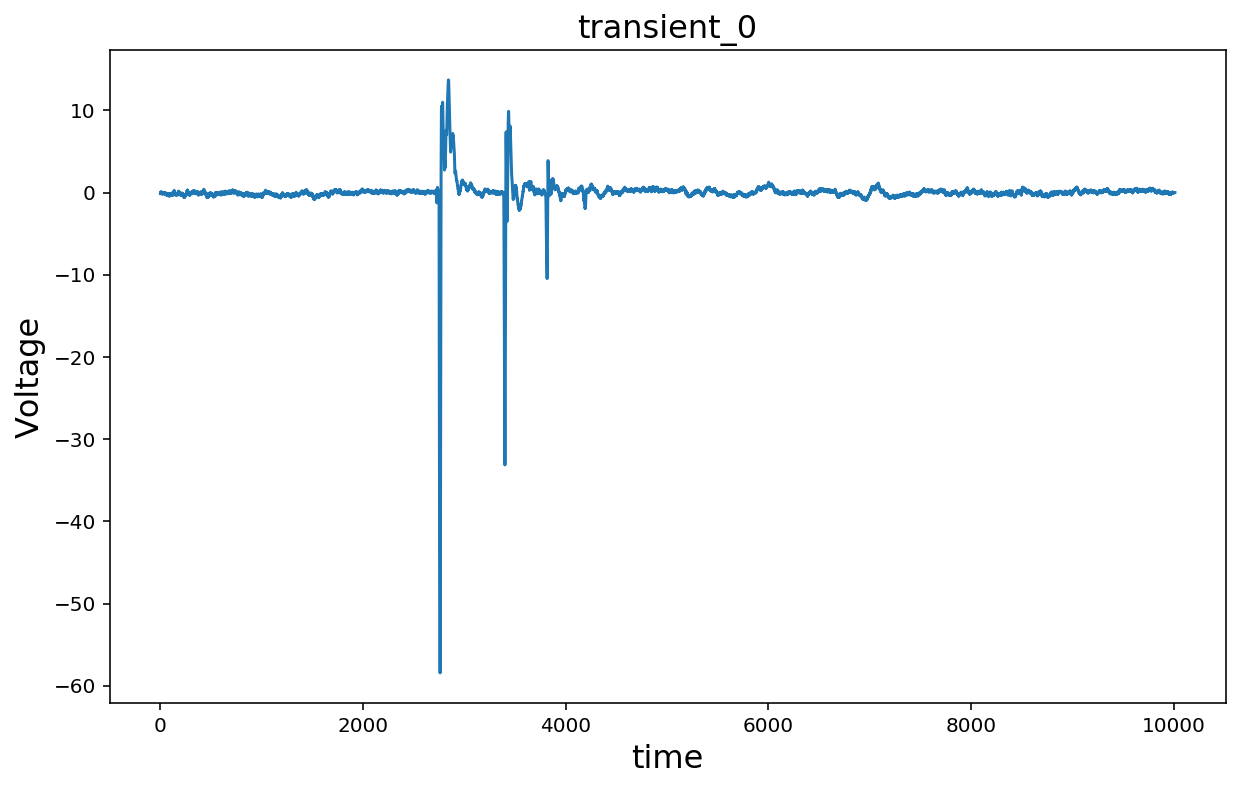

In [33]:
print(transients_1_phase.iloc[[0]]['three_first_peaks'])
plot_transient(transients_filtered.iloc[0:1,:], "transient_0")

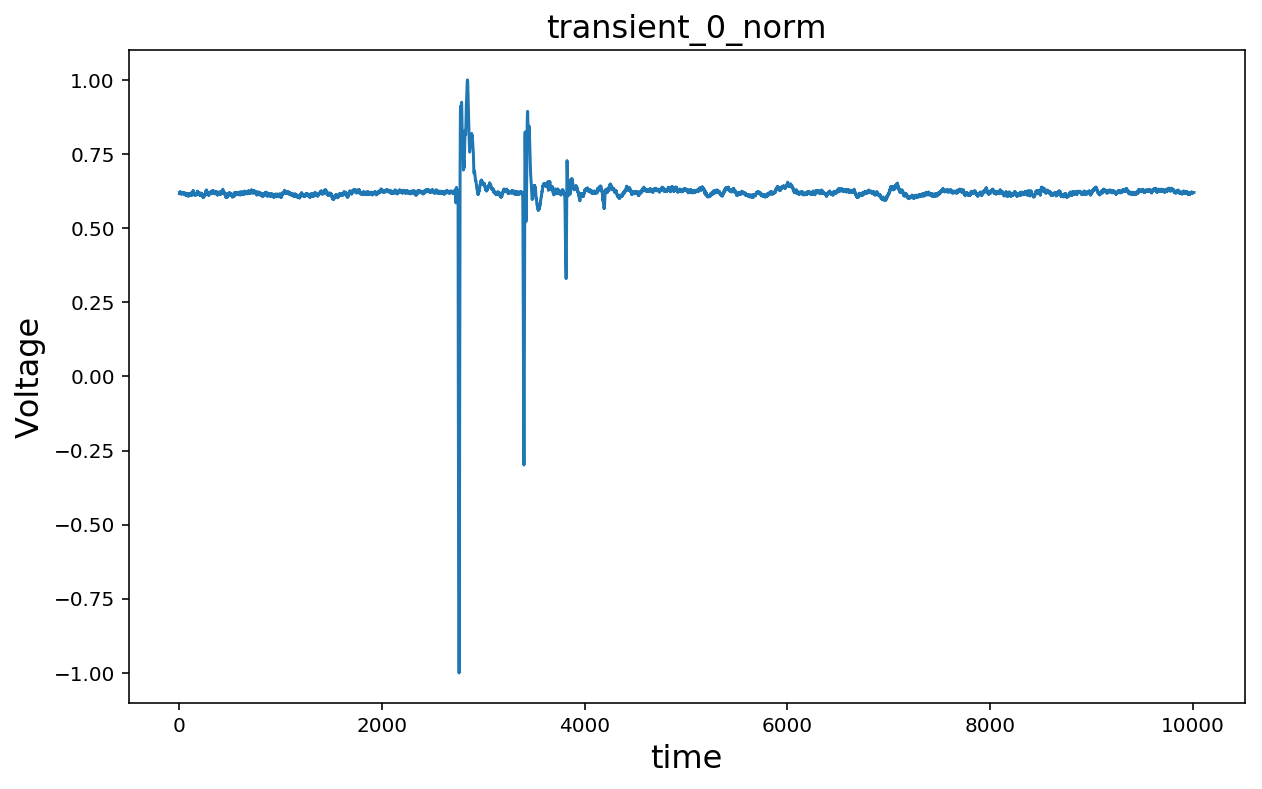

In [34]:
plot_transient(transients_filtered.iloc[0:1,:], "transient_0")

In [ ]:
print(transients_1_phase.iloc[[1]]['three_first_peaks'])
plot_transient(transients_filtered.iloc[1:2,:], "transient_1")

In [ ]:
print(transients_1_phase.iloc[[2]]['three_first_peaks'])
plot_transient(transients_filtered.iloc[2:3,:], "transient_2")

In [ ]:
plot_transient(transients_filtered.iloc[3:4,:], "transient_3")

Zunächst sollen die Daten vereinfacht werden. Dazu werden alle Werte die kleiner als 0 sind auf 0 gesetzt werden. Dann können alle Max peaks ab 3 Volt berechnet werden. 

In [ ]:
transients_filtered[transients_filtered < 0] = 0

In [ ]:
index = transients_filtered.index

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(transients_filtered.T)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.head()

In [ ]:
from sklearn import preprocessing

In [ ]:
plot_transient(df_normalized.T.iloc[0:1,:], "transient_0")

In [ ]:
plot_transient(transients_filtered.iloc[0:1,:], "transient_0")

In [ ]:
def plot_transient_peaks(transient, plot_name):
    length = len(transient.columns)
    x = numpy.linspace(0, length, length)
    y = transient.values
    y_reshape = np.reshape(y, (length, ))
    indexes = peakutils.indexes(y_reshape, thres=0.5, min_dist=5)
    print(indexes)
    pyplot.figure(figsize=(10,6))
    pplot(x, y_reshape, indexes)
    pyplot.title(plot_name, fontsize=16)
    pyplot.xlabel('time', fontsize=16)
    pyplot.ylabel('Voltage', fontsize=16)

In [ ]:
plot_transient_peaks(transients_filtered.iloc[0:1,:], "transient_0")

In [ ]:
pyplot.figure(figsize=(40,24))
pplot(x, y_reshape, indexes)
pyplot.title('First estimate transients')

Wie zuerkennen ist, hat der Algorithmus probleme die Peak zufinden. Das bedeutet ich muss ein Rohdaten noch ein wenig aufräumen, dazu werde ich zunächst alle negativen Werte auf Null setzen um so unnötigte Daten zunächst auszublenden.